<a href="https://colab.research.google.com/github/surodoot/Python/blob/main/Machine%20Learning/Spam%20mail%20recognition%20with%20Bayes's%20Theorem%20%2B%20Logistic%20Regression%20%2B%20RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data analyzing

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [26]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/10.%20RNN%20Text%20Classification/dataset/spam.csv", filename="spam.csv")
data = pd.read_csv('spam.csv', encoding='latin1')
print('총 샘플의 수 :',len(data))

총 샘플의 수 : 5572


In [27]:
del data['Unnamed: 2']
del data['Unnamed: 3']
del data['Unnamed: 4']
data['v1'] = data['v1'].replace(['ham','spam'],[0,1])
data[:5]

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [28]:
cnt = 0
_spam_frequency = {}
_normal_frequency = {}  
_total = {}


for i in data["v1"] :

  for j in data["v2"][cnt].split(' ') :
    if j in _total.keys() :
      _total[j] += 1

    else :
      _total[j] = 1


  if i == 1 :
    for j in data["v2"][cnt].split(' ') :
      if j in _spam_frequency.keys() :
        _spam_frequency[j] += 1

      else :
        _spam_frequency[j] = 1

  else :
    for j in data["v2"][cnt].split(' ') :
      if j in _normal_frequency.keys() :
        _normal_frequency[j] += 1

      else :
        _normal_frequency[j] = 1
  
  cnt += 1

print(_normal_frequency)
print(_spam_frequency)
print(_total)

{'Go': 10, 'until': 21, 'jurong': 1, 'point,': 1, 'crazy..': 1, 'Available': 1, 'only': 102, 'in': 734, 'bugis': 4, 'n': 128, 'great': 70, 'world': 17, 'la': 2, 'e': 71, 'buffet...': 1, 'Cine': 1, 'there': 109, 'got': 200, 'amore': 1, 'wat...': 12, 'Ok': 97, 'lar...': 18, 'Joking': 1, 'wif': 26, 'u': 645, 'oni...': 2, 'U': 229, 'dun': 46, 'say': 72, 'so': 272, 'early': 24, 'hor...': 2, 'c': 41, 'already': 44, 'then': 138, 'say...': 3, 'Nah': 7, 'I': 1436, "don't": 103, 'think': 112, 'he': 127, 'goes': 26, 'to': 1530, 'usf,': 2, 'lives': 2, 'around': 51, 'here': 72, 'though': 15, 'Even': 15, 'my': 619, 'brother': 9, 'is': 638, 'not': 320, 'like': 209, 'speak': 11, 'with': 248, 'me.': 90, 'They': 30, 'treat': 11, 'me': 537, 'aids': 1, 'patent.': 1, 'As': 27, 'per': 11, 'your': 373, 'request': 6, "'Melle": 3, 'Melle': 3, '(Oru': 3, 'Minnaminunginte': 3, 'Nurungu': 3, "Vettam)'": 3, 'has': 83, 'been': 77, 'set': 18, 'as': 112, 'callertune': 5, 'for': 475, 'all': 191, 'Callers.': 5, 'Press'

In [29]:
plt.rc('font', size=20)        # 기본 폰트 크기
plt.rc('axes', labelsize=30)   # x,y축 label 폰트 크기
plt.rc('xtick', labelsize=20)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=20)  # y축 눈금 폰트 크기
plt.rc('legend', fontsize=20)  # 범례 폰트 크기
plt.rc('figure', titlesize=20) # figure title 폰트 크기

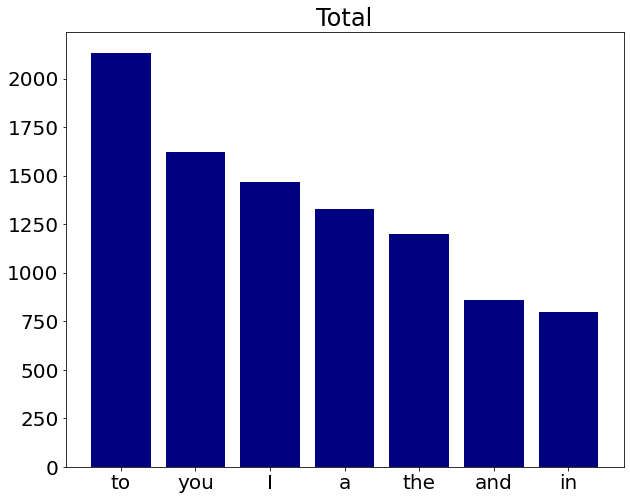

In [30]:
total = sorted( _total.items(), key=lambda x: x[1], reverse=True)
x = [ i[0] for i in total ]
y = [ i[1] for i in total ]

plt.figure( figsize = ( 10, 8))
plt.bar(x[:7], y[:7], color = 'navy')
plt.title("Total")
plt.savefig('total.eps', format='eps')

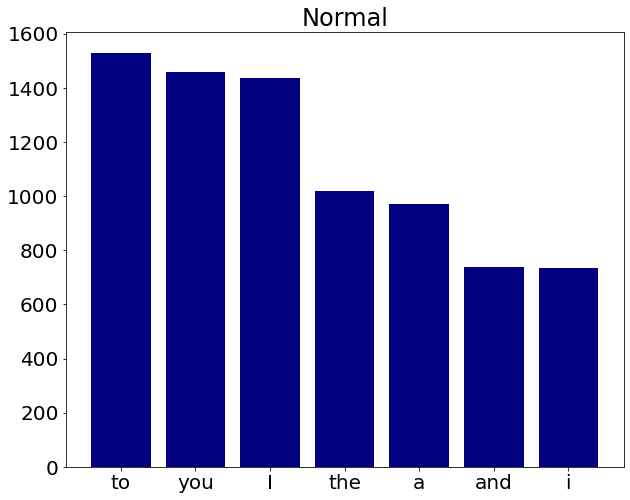

In [31]:
normal = sorted(_normal_frequency.items(), key=lambda x: x[1], reverse=True)
x = [ i[0] for i in normal ]
y = [ i[1] for i in normal ]

plt.figure( figsize = ( 10, 8))
plt.bar(x[:7], y[:7], color = 'navy')
plt.title("Normal")

plt.savefig('normal.eps', format='eps')
plt.show()

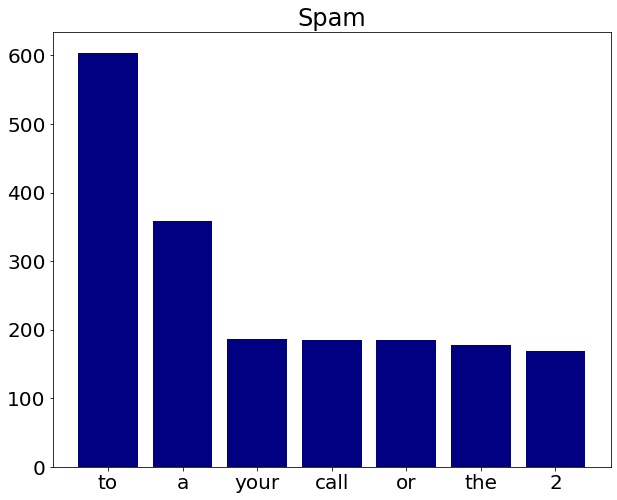

In [32]:
spam = sorted(_spam_frequency.items(), key=lambda x: x[1], reverse=True)
x = [ i[0] for i in spam ]
y = [ i[1] for i in spam ]

plt.figure( figsize = ( 10, 8))
plt.bar(x[:7], y[:7], color = 'navy')
plt.title("Spam")

plt.savefig('spam.eps', format='eps')
plt.show()

#Bayes's Theorem

In [33]:
p_spam = []
p = 1
weight = 1

test = input()  #문장 입력

char_test = test.split(' ') #한 단어씩 분류

for i in char_test :  #한단어 씩 확률 계산
  if i in _spam_frequency.keys() :  #spam dataset에 있는 data만 연산 ( dataset에 없으면 확률이 0이 되어버림 )
    p_spam.append( ( ( int(  _spam_frequency[i] )  /  sum(_spam_frequency.values()) ) * (  sum(_spam_frequency.values()) /  sum(_total.values()) ) ) / ( int( _total[i] )  / sum(_total.values()) ) )  #bayes's theorm

  else :  #https://mole-starseeker.tistory.com/78 라플라스 스무딩
     p_spam.append( ( ( 0 + weight /  sum(_spam_frequency.values()) + 2 * weight ) * (  sum(_spam_frequency.values()) /  sum(_total.values()) ) ) / ( 0 + weight  / sum(_total.values()) + 2 * weight ) )  #bayes's theorm


for i in p_spam :
  p *= i  #각 단어별 확률을 곱해 그 문장이 spam 일 확률 구함

print("Possibility of spam :", p * 100)

free
Possibility of spam : 56.56565656565656


In [34]:
p_normal = []
p = 1

for i in char_test :
  if i in _normal_frequency.keys() :
    p_normal.append( ( ( int(  _normal_frequency[i] )  /  sum(_normal_frequency.values()) ) * (  sum(_normal_frequency.values()) /  sum(_total.values()) ) ) / ( int( _total[i] )  / sum(_total.values()) ) )  #bayes's theorm
    
  else :
    p_normal.append( ( ( 0 + weight /  sum(_normal_frequency.values()) + 2 * weight ) * (  sum( _normal_frequency.values()) /  sum(_total.values()) ) ) / ( 0 + weight  / sum(_total.values()) + 2 * weight ) )


for i in p_normal :
  p *= i

print("Possibility of normal :", p * 100)

Possibility of normal : 43.43434343434343


In [35]:
'''
p_spam = []
p = 1

test = input()

char_test = test.split(' ')

for i in char_test :
  if i in _normal_frequency.keys() :
    p_spam.append(int (_normal_frequency[i])  / len(_spam_frequency))

for i in p_spam :
  p *= i

print(p*100)
'''

"\np_spam = []\np = 1\n\ntest = input()\n\nchar_test = test.split(' ')\n\nfor i in char_test :\n  if i in _normal_frequency.keys() :\n    p_spam.append(int (_normal_frequency[i])  / len(_spam_frequency))\n\nfor i in p_spam :\n  p *= i\n\nprint(p*100)\n"

#Logistic regression


train data 생성

In [36]:
import math as m

In [37]:
def spam_detection( sentence_ ) :
  _p_spam = []
  _p = 1
  _weight = 1

  _char_ = sentence_.split(' ')

  for i in _char_ :  
    if i in _spam_frequency.keys() :  
      _p_spam.append( ( ( int(  _spam_frequency[i] )  /  sum(_spam_frequency.values()) ) * (  sum(_spam_frequency.values()) /  sum(_total.values()) ) ) / ( int( _total[i] )  / sum(_total.values()) ) )  

    else :  
      _p_spam.append( ( ( 0 + _weight /  sum(_spam_frequency.values()) + 2 * _weight ) * (  sum(_spam_frequency.values()) /  sum(_total.values()) ) ) / ( 0 + _weight  / sum(_total.values()) + 2 * _weight ) ) 


  for i in _p_spam :
    _p *= i 

  return m.log10( _p * 100 )



In [38]:
x_data = []

for i in data["v2"] :
  x_data.append(spam_detection(i))
  
y_data = [ y for y in data["v1"]]

print(y_data)

[0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 

In [39]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(x_data, y_data, test_size = 0.2)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

train_features2 = np.array(train_features)
test_features2 = np.array(test_features)

train_features = scaler.fit_transform(train_features2.reshape(-1,1))
test_features = scaler.transform(test_features2.reshape(-1,1))

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(train_features, train_labels)

print(model.score(train_features, train_labels))
print(model.score(test_features, test_labels))
print(model.coef_)
print(len(x_data))
print(len(y_data))


0.8696432577967242
0.8511210762331839
[[1.3194092]]
5572
5572


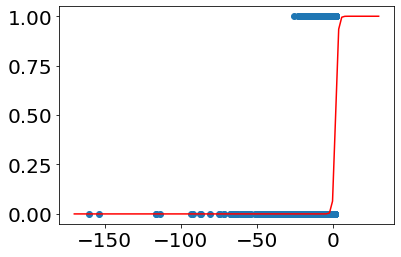

In [40]:
import numpy as np
import matplotlib.pyplot as plt
'''
xx = np.linspace(-5, 5, 1000)
plt.plot(xx, 1/(1+np.exp(-xx)), 'r-', label="Logistic function")
plt.ylim([-1.1, 1.1])
plt.legend(loc=2)
plt.xlabel("x")
plt.show()
'''
xx = np.linspace(-170, 30, 100)
mu = 1.0/(1 + np.exp(-model.coef_[0][0]*xx - model.intercept_[0]))
plt.plot(xx, mu, color = 'red')

plt.scatter(x_data, y_data)
plt.show()

In [41]:
word = str( input() )
test = np.array(spam_detection(word))
#ftest = scaler.transform(test.reshape(-1, 1))
print(model.predict(test.reshape(-1, 1)))

free
[1]


#RNN Algorithm

In [42]:
# v2 열에서 중복인 내용이 있다면 중복 제거
data.drop_duplicates(subset=['v2'], inplace=True)
print('총 샘플의 수 :',len(data))

총 샘플의 수 : 5169


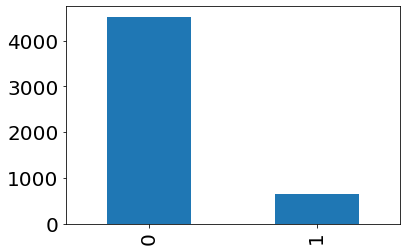

In [43]:
data['v1'].value_counts().plot(kind='bar')

In [48]:
print('Normal mail and spam mail.')
print(data.groupby('v1').size().reset_index(name='count'))

Normal mail and spam mail.
   v1  count
0   0   4516
1   1    653


In [49]:
print(f'Ratio of normal mail = {round(data["v1"].value_counts()[0]/len(data) * 100,3)}%')
print(f'Ratio of spam mail = {round(data["v1"].value_counts()[1]/len(data) * 100,3)}%')

Ratio of normal mail = 87.367%
Ratio of spam mail = 12.633%


In [51]:
X_train, X_test, y_train, y_test = train_test_split(data["v2"], data["v1"], test_size=0.2, random_state=0, stratify=data["v1"])
print('--------Ratio of Train data-----------')
print(f'Normal mail = {round(y_train.value_counts()[0]/len(y_train) * 100,3)}%')
print(f'Spam mail = {round(y_train.value_counts()[1]/len(y_train) * 100,3)}%')
print('--------Ratio of Test data-----------')
print(f'Normal mail = {round(y_test.value_counts()[0]/len(y_test) * 100,3)}%')
print(f'Spam mail = {round(y_test.value_counts()[1]/len(y_test) * 100,3)}%')

--------Ratio of Train data-----------
Normal mail = 87.376%
Spam mail = 12.624%
--------Ratio of Test data-----------
Normal mail = 87.331%
Spam mail = 12.669%


In [47]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_encoded = tokenizer.texts_to_sequences(X_train)
word_to_index = tokenizer.word_index
print(word_to_index)

{'i': 1, 'to': 2, 'you': 3, 'a': 4, 'the': 5, 'u': 6, 'and': 7, 'in': 8, 'is': 9, 'me': 10, 'my': 11, 'for': 12, 'your': 13, 'it': 14, 'of': 15, 'have': 16, 'on': 17, 'call': 18, 'that': 19, 'are': 20, '2': 21, 'now': 22, 'so': 23, 'but': 24, 'not': 25, 'can': 26, 'or': 27, "i'm": 28, 'get': 29, 'at': 30, 'do': 31, 'if': 32, 'be': 33, 'will': 34, 'just': 35, 'with': 36, 'we': 37, 'no': 38, 'this': 39, 'ur': 40, 'up': 41, '4': 42, 'how': 43, 'gt': 44, 'lt': 45, 'go': 46, 'when': 47, 'from': 48, 'what': 49, 'ok': 50, 'out': 51, 'know': 52, 'free': 53, 'all': 54, 'like': 55, 'then': 56, 'got': 57, 'good': 58, 'am': 59, 'time': 60, 'was': 61, 'come': 62, 'its': 63, 'love': 64, 'want': 65, 'text': 66, 'he': 67, 'only': 68, 'there': 69, 'day': 70, 'need': 71, 'going': 72, 'lor': 73, 'send': 74, 'one': 75, 'as': 76, 'home': 77, 'about': 78, 'back': 79, 'still': 80, 'k': 81, 'see': 82, 'txt': 83, 'by': 84, 'da': 85, 'stop': 86, 'r': 87, 'any': 88, 'tell': 89, 'dont': 90, "i'll": 91, "don't": 9

In [ ]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential

embedding_dim = 32
hidden_units = 32

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(SimpleRNN(hidden_units))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train_padded, y_train, epochs=4, batch_size=64, validation_split=0.2)

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_encoded = tokenizer.texts_to_sequences(X_train)
word_to_index = tokenizer.word_index
print(word_to_index)
threshold = 2
total_cnt = len(word_to_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value
max_len = 189
X_train_padded = pad_sequences(X_train_encoded, maxlen = max_len)

X_test_encoded = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test_encoded, maxlen = max_len)
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test_padded, y_test)[1]))

epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()